In [5]:
#upload data from csv
import pandas as pd
videos = pd.read_csv('GBvideos.csv', sep=',', decimal='.', header=0)
#videos

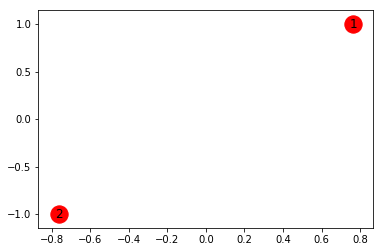

In [11]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

#TODO criar grafo
G.add_node(1,2)
G.add_edge()

nx.draw_networkx(G)
plt.show()